# Data Cleaning, EDA, and Statistical Modeling Workbook

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://githubtocolab.com/noportman/noportman.github.io/blob/main/docs/notebooks/03_prescriptive_model.ipynb)
[![Download](https://img.shields.io/badge/Download-to_Computer-blue?style=flat&logo=google-drive)](https://raw.githubusercontent.com/[noportman/noportman.github.io/blob/main/docs/notebooks/03_prescriptive_model.ipynb)

![Python](https://img.shields.io/badge/Python-3.10-blue)
![NumPy](https://img.shields.io/badge/NumPy-Numerical%20Computing-orange?logo=numpy)
![Pandas](https://img.shields.io/badge/Pandas-Data%20Analysis-lightgrey?logo=pandas)
![Matplotlib](https://img.shields.io/badge/Matplotlib-Visualization-blue?logo=matplotlib)
![Seaborn](https://img.shields.io/badge/Seaborn-Statistical%20Visualization-9b59b6?logo=seaborn)
![SciPy](https://img.shields.io/badge/SciPy-Statistical%20Functions-lightblue?logo=scipy)
![scikit-learn](https://img.shields.io/badge/scikit--learn-ML%20Toolkit-f7931e?logo=scikit-learn)
![Statsmodels](https://img.shields.io/badge/Statsmodels-Statistical%20Modeling-lightgreen)
![chardet](https://img.shields.io/badge/chardet-Encoding%20Detection-lightblue)
![codecs](https://img.shields.io/badge/codecs-Text%20Encoding-grey)
![skimpy](https://img.shields.io/badge/skimpy-Data%20Summary-teal)

![Status](https://img.shields.io/badge/Status-Completed-brightgreen)
![License](https://img.shields.io/badge/License-MIT-yellow)

## Introduction

This notebook walks through a full data analysis pipeline — from raw data ingestion and encoding detection to exploratory data analysis (EDA), statistical modeling, and model performance evaluation. Key tools include `chardet` and `codecs` for encoding detection, `pandas` and `skimpy` for data exploration, `statsmodels` for linear and logistic regression, and `scikit-learn` for evaluation metrics such as confusion matrices and accuracy scores.

In [ ]:
# Install dependencies, if needed
!pip install skimpy

In [2]:
import chardet
import pandas as pd

# Read the CSV file using the detected encoding and specifying the delimiter

url = "https://docs.google.com/spreadsheets/d/10L8BpkV4q1Zsou4daYoWul_8PFA9rsv2/export?format=csv&id=10L8BpkV4q1Zsou4daYoWul_8PFA9rsv2&gid=1710894028"
df = pd.read_csv(url, index_col=False)

df.head()

,default,installment,log_income,fico_score,rev_balance,inquiries,records
0,0,829,4.93,737,28.85,0,0
1,0,228,4.81,707,33.62,0,0
2,0,367,4.51,682,3.51,1,0
3,0,162,4.93,712,33.67,1,0
4,0,103,4.91,667,4.74,0,0


In [3]:
# imports packages to be used in the code
import numpy as np
import codecs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn as skl
from statsmodels.formula.api import ols
from statsmodels.formula.api import logit
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from skimpy import skim

print(skl.__version__)

df

1.6.1


,default,installment,log_income,fico_score,rev_balance,inquiries,records
0,0,829,4.93,737,28.85,0,0
1,0,228,4.81,707,33.62,0,0
2,0,367,4.51,682,3.51,1,0
3,0,162,4.93,712,33.67,1,0
4,0,103,4.91,667,4.74,0,0
...,...,...,...,...,...,...,...
9511,1,345,5.29,672,215.37,2,0
9512,1,258,4.84,722,0.18,5,0
9513,1,98,4.60,687,10.04,8,0
9514,1,352,4.70,692,0.00,5,0


In [5]:
# shows first 6 rows of dataframe
df.head(6)

,default,installment,log_income,fico_score,rev_balance,inquiries,records
0,0,829,4.93,737,28.85,0,0
1,0,228,4.81,707,33.62,0,0
2,0,367,4.51,682,3.51,1,0
3,0,162,4.93,712,33.67,1,0
4,0,103,4.91,667,4.74,0,0
5,0,125,5.17,727,50.81,0,0


In [6]:
df.tail(6)

,default,installment,log_income,fico_score,rev_balance,inquiries,records
9510,1,70,4.39,662,3.00,6,0
9511,1,345,5.29,672,215.37,2,0
9512,1,258,4.84,722,0.18,5,0
9513,1,98,4.60,687,10.04,8,0
9514,1,352,4.70,692,0.00,5,0
9515,1,853,4.89,732,37.88,6,0


In [7]:
df = df[["default", "fico_score"]]

In [8]:
df

,default,fico_score
0,0,737
1,0,707
2,0,682
3,0,712
4,0,667
...,...,...
9511,1,672
9512,1,722
9513,1,687
9514,1,692


In [9]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 9516   │ │ int64       │ 2     │                                                          │
│ │ Number of columns │ 2      │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column          ┃ NA   ┃ NA %    ┃ mean      ┃ sd        ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ default         │    0 │       0 │    0.1598 │    0.3665 │     0 │     0 │     0 │     0 │     1 │ █    ▂  │  │
│ │ fico_score      │    0 │       0 │     710.8 │     37.96 │   612 │   682 │   707 │   737 │   827 │ ▁▆█▅▃▁  │  │
│ └─────────────────┴──────┴─────────┴───────────┴───────────┴───────┴───────┴───────┴───────┴───────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

Text(0, 0.5, 'fico')

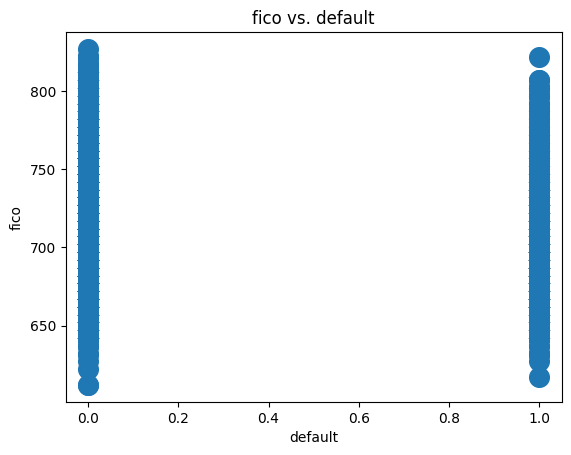

In [10]:
# plot target variable
# plt.scatter(df['default'], df['inquiries'],alpha =0.0, s=200)
# df = pd.read_excel('loans.xlsx')
plt.scatter(df["default"], df["fico_score"], alpha=1.0, s=200)
plt.title("fico vs. default")
plt.xlabel("default")
plt.ylabel("fico")

In [11]:
# data split into 70% train and 30% test
df_train, df_test = train_test_split(df, test_size=0.3)

In [12]:
print(df_train)
# Save the DataFrame to a CSV file
# Replace 'file_path' with the path where you want to save the file
file_path = "df_train.csv"
df_train.to_csv(file_path, index=False)

      default  fico_score
6475        0         707
9413        0         687
9347        0         667
1360        0         722
5791        0         742
...       ...         ...
1563        0         687
1683        0         707
2459        0         792
3205        0         697
1815        0         737

[6661 rows x 2 columns]


In [13]:
skim(df_train)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 6661   │ │ int64       │ 2     │                                                          │
│ │ Number of columns │ 2      │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column          ┃ NA   ┃ NA %    ┃ mean      ┃ sd        ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ default         │    0 │       0 │    0.1609 │    0.3675 │     0 │     0 │     0 │     0 │     1 │ █    ▂  │  │
│ │ fico_score      │    0 │       0 │     710.8 │     37.97 │   612 │   682 │   707 │   737 │   827 │ ▁▆█▅▃▁  │  │
│ └─────────────────┴──────┴─────────┴───────────┴───────────┴───────┴───────┴───────┴───────┴───────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [14]:
skim(df_test)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 2855   │ │ int64       │ 2     │                                                          │
│ │ Number of columns │ 2      │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column          ┃ NA   ┃ NA %    ┃ mean      ┃ sd        ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ default         │    0 │       0 │    0.1573 │    0.3641 │     0 │     0 │     0 │     0 │     1 │ █    ▁  │  │
│ │ fico_score      │    0 │       0 │     710.9 │     37.92 │   612 │   682 │   707 │   737 │   822 │  ▅█▆▃▁  │  │
│ └─────────────────┴──────┴─────────┴───────────┴───────────┴───────┴───────┴───────┴───────┴───────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [15]:
# build formula,  target (dependent variable) ~ features (independent variables)
# build model, fit the formula to the training data using a logistic algorithm (logit)
est = logit(formula="default ~ fico_score", data=df_train).fit()

# print the results of the model (est).
# Examine; Pseudo R-square

print(est.summary())

Optimization terminated successfully.
         Current function value: 0.430210
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 6661
Model:                          Logit   Df Residuals:                     6659
Method:                           MLE   Df Model:                            1
Date:                Mon, 12 May 2025   Pseudo R-squ.:                 0.02495
Time:                        16:10:48   Log-Likelihood:                -2865.6
converged:                       True   LL-Null:                       -2939.0
Covariance Type:            nonrobust   LLR p-value:                 9.265e-34
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.3495      0.685      9.271      0.000       5.007       7.692
fico_score    -0.0113      0.

In [16]:
# apply the model (est) to the test data and make predictions
preds = est.predict(df_test)
df_test["predicted_probability"] = preds

# print top 6 predicted probabilities
df_test.head(6)

,default,fico_score,predicted_probability
7049,0,727,0.130611
1992,1,717,0.144038
5282,0,687,0.191249
6502,0,732,0.124306
2682,0,752,0.101644
6533,0,712,0.151171


In [17]:
# test for 'predicted_probability > 0.5, if yes assign will_default to 1, otherwise to 0
df_test["will_default"] = np.where(df_test["predicted_probability"] > 0.25, 1, 0)
df_test.head(6)
print(df_test)

      default  fico_score  predicted_probability  will_default
7049        0         727               0.130611             0
1992        1         717               0.144038             0
5282        0         687               0.191249             0
6502        0         732               0.124306             0
2682        0         752               0.101644             0
...       ...         ...                    ...           ...
5950        1         687               0.191249             0
7321        0         702               0.166307             0
2348        0         692               0.182631             0
9027        0         677               0.209407             0
3031        0         712               0.151171             0

[2855 rows x 4 columns]


## Confusion Matrix

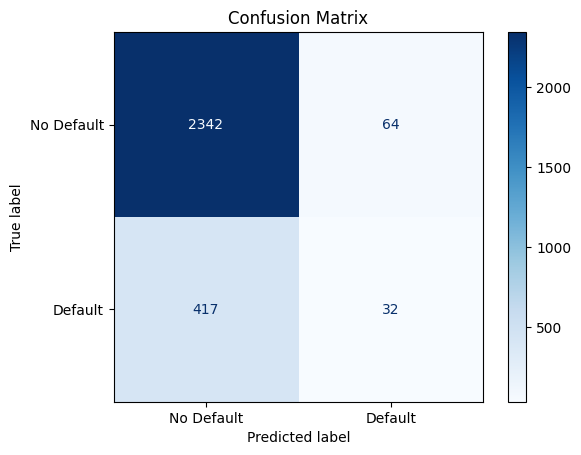

Accuracy: 0.831523642732049


In [18]:
# Evaluation Metrics
# print confusion matrix with labels

# Plot the confusion matrix with the custom Seaborn-based colormap
disp = ConfusionMatrixDisplay.from_predictions(
    df_test["default"],
    df_test["will_default"],
    display_labels=["No Default", "Default"],
    cmap="Blues",
)

plt.title("Confusion Matrix")
plt.show()

# print accuracy
print("Accuracy: " + str(accuracy_score(df_test["default"], df_test["will_default"])))

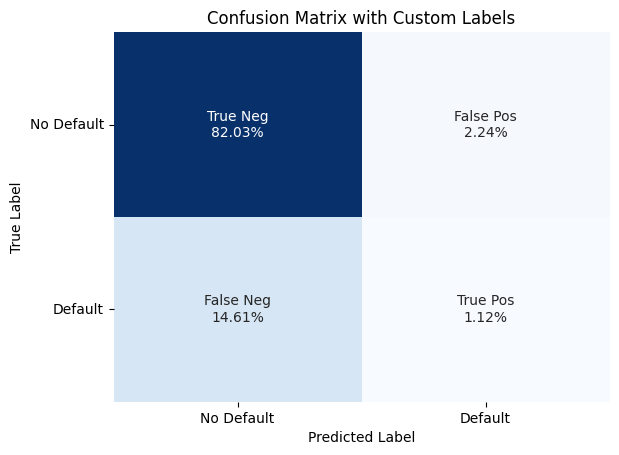

In [19]:
matrix = confusion_matrix(df_test["default"], df_test["will_default"])

# Normalize the matrix to get percentages
normalized_matrix = matrix / np.sum(matrix)

# Create label overlay
labels = ["True Neg", "False Pos", "False Neg", "True Pos"]
labels = np.asarray(labels).reshape(2, 2)

# Format labels with percentages + class names
annot = np.empty_like(labels, dtype=object)
for i in range(2):
    for j in range(2):
        annot[i, j] = f"{labels[i, j]}\n{normalized_matrix[i, j]:.2%}"

# Plot heatmap with combined labels and percentages
sns.heatmap(normalized_matrix, annot=annot, fmt="", cmap="Blues", cbar=False)

plt.title("Confusion Matrix with Custom Labels")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks([0.5, 1.5], ["No Default", "Default"])
plt.yticks([0.5, 1.5], ["No Default", "Default"], rotation=0)
plt.show()